# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


### 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np

np.random.seed(10)

Using TensorFlow backend.


In [2]:
# 載入手寫辨識資料集
from keras.datasets import mnist

(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [3]:
print(x_train_image.shape, x_train_image.dtype)
print(x_test_image.shape, x_test_image.dtype)

(60000, 28, 28) uint8
(10000, 28, 28) uint8


In [4]:
# 將訓練資料、測試資料 的資料型態和維度做轉換
x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
print(x_train.shape, x_train.dtype)
print(x_test.shape, x_test.dtype)

(60000, 784) float32
(10000, 784) float32


In [6]:
# 資料正規化，將 0-255 的灰階轉換成為 0-1
x_train_normalize = x_train/255
x_test_normalize = x_test/255

In [7]:
# 將分類結果 Label 轉成 Numberical Categorical
y_train_OneHot = np_utils.to_categorical(y_train_label)
y_test_OneHot = np_utils.to_categorical(y_test_label)

### 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense

# 宣告採用序列模型
model = Sequential()

W0926 14:01:05.512980  6560 deprecation_wrapper.py:119] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [9]:
# 建構輸入層
model.add(Dense(units=512, # 預計輸出到下一層的維度
                input_dim=784, # 輸入的維度
                kernel_initializer='normal',
                activation='relu'))

# 建構隱藏層
model.add(Dense(units=256,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=128,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=64,
                kernel_initializer='normal',
                activation='relu'))

# 建構輸出層
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

W0926 14:01:30.459730  6560 deprecation_wrapper.py:119] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0926 14:01:30.757738  6560 deprecation_wrapper.py:119] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________
None


### 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0926 14:01:48.577253  6560 deprecation_wrapper.py:119] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0926 14:01:48.827412  6560 deprecation_wrapper.py:119] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
train_history = model.fit(x=x_train_normalize,
                          y=y_train_OneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=32,
                          verbose=1)

W0926 14:01:53.594387  6560 deprecation.py:323] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0926 14:01:53.701321  6560 deprecation_wrapper.py:119] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 21s 432us/step - loss: 0.2642 - acc: 0.9187 - val_loss: 0.1067 - val_acc: 0.9683
Epoch 2/10
48000/48000 [==============================] - 17s 359us/step - loss: 0.1066 - acc: 0.9680 - val_loss: 0.1169 - val_acc: 0.9687
Epoch 3/10
48000/48000 [==============================] - 18s 374us/step - loss: 0.0735 - acc: 0.9787 - val_loss: 0.1029 - val_acc: 0.9708
Epoch 4/10
48000/48000 [==============================] - 18s 367us/step - loss: 0.0571 - acc: 0.9827 - val_loss: 0.1063 - val_acc: 0.9718
Epoch 5/10
48000/48000 [==============================] - 18s 375us/step - loss: 0.0451 - acc: 0.9867 - val_loss: 0.1018 - val_acc: 0.9716
Epoch 6/10
48000/48000 [==============================] - 18s 368us/step - loss: 0.0401 - acc: 0.9881 - val_loss: 0.0975 - val_acc: 0.9764
Epoch 7/10
48000/48000 [==============================] - 18s 373us/step - loss: 0.0332 - acc: 0.9897 - val_loss: 0.

### 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

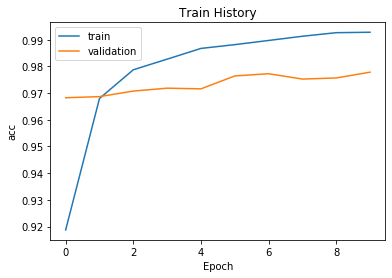

In [15]:
show_train_history(train_history, 'acc', 'val_acc')

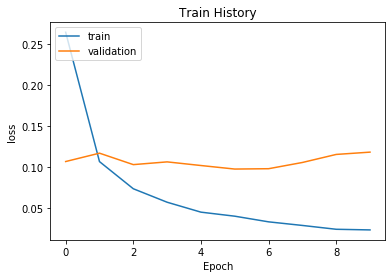

In [16]:
show_train_history(train_history, 'loss', 'val_loss')

### 評估模型準確率

In [17]:
scores = model.evaluate(x_test_normalize, y_test_OneHot)

print('\naccuracy = ',scores[1])

10000/10000 [==============================] - 1s 85us/step

accuracy =  0.9789


In [19]:
??Dense # 觀察 Dense 的函數